# Quantum Tunneling Through a Rectangular Potential Barrier

## 1. Introduction

Quantum tunneling is one of the most striking phenomena predicted by quantum mechanics, with no classical analog. It describes the ability of a quantum particle to penetrate through a potential energy barrier even when its total energy is less than the barrier height—a process strictly forbidden in classical mechanics.

This phenomenon has profound implications across physics and technology, including:
- **Alpha decay** in nuclear physics
- **Scanning tunneling microscopy (STM)**
- **Tunnel diodes** and other semiconductor devices
- **Josephson junctions** in superconducting circuits

## 2. Theoretical Framework

### 2.1 The Time-Independent Schrödinger Equation

For a particle of mass $m$ moving in one dimension under a potential $V(x)$, the time-independent Schrödinger equation is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

where:
- $\hbar = h/(2\pi)$ is the reduced Planck constant
- $\psi(x)$ is the spatial wave function
- $E$ is the total energy of the particle

### 2.2 Rectangular Potential Barrier

We consider a rectangular barrier of height $V_0$ and width $a$ centered at the origin:

$$V(x) = \begin{cases} 0 & x < 0 \quad \text{(Region I)} \\ V_0 & 0 \leq x \leq a \quad \text{(Region II)} \\ 0 & x > a \quad \text{(Region III)} \end{cases}$$

### 2.3 Wave Function Solutions

For a particle with energy $E < V_0$ incident from the left:

**Region I** ($x < 0$):
$$\psi_I(x) = Ae^{ikx} + Be^{-ikx}$$

where $k = \sqrt{2mE}/\hbar$ is the wave number, $A$ represents the incident wave amplitude, and $B$ the reflected wave amplitude.

**Region II** ($0 \leq x \leq a$):
$$\psi_{II}(x) = Ce^{\kappa x} + De^{-\kappa x}$$

where $\kappa = \sqrt{2m(V_0-E)}/\hbar$ is the decay constant inside the barrier.

**Region III** ($x > a$):
$$\psi_{III}(x) = Fe^{ikx}$$

representing only the transmitted wave (no reflection from the right).

### 2.4 Transmission Coefficient

Applying boundary conditions (continuity of $\psi$ and $d\psi/dx$ at $x=0$ and $x=a$), the transmission coefficient $T$ is:

$$T = \frac{|F|^2}{|A|^2} = \left[1 + \frac{V_0^2 \sinh^2(\kappa a)}{4E(V_0-E)}\right]^{-1}$$

For a thick barrier ($\kappa a \gg 1$), this simplifies to:

$$T \approx \frac{16E(V_0-E)}{V_0^2}e^{-2\kappa a}$$

The exponential dependence on barrier width $a$ is the hallmark of quantum tunneling.

### 2.5 Reflection Coefficient

By conservation of probability current, the reflection coefficient is:

$$R = 1 - T$$

## 3. Numerical Implementation

We will now implement a computational study of quantum tunneling, computing and visualizing:
1. The transmission coefficient as a function of particle energy
2. The wave function across all three regions
3. The probability density $|\psi(x)|^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, electron_mass, eV

# Set up publication-quality plot parameters
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 11,
    'figure.figsize': (12, 10),
    'lines.linewidth': 2
})

In [2]:
def transmission_coefficient(E, V0, a, m):
    """
    Calculate the transmission coefficient for a rectangular barrier.
    
    Parameters:
    -----------
    E : float or array
        Particle energy in Joules
    V0 : float
        Barrier height in Joules
    a : float
        Barrier width in meters
    m : float
        Particle mass in kg
    
    Returns:
    --------
    T : float or array
        Transmission coefficient (0 <= T <= 1)
    """
    E = np.asarray(E)
    T = np.zeros_like(E, dtype=float)
    
    # Case: E < V0 (tunneling regime)
    mask_tunnel = E < V0
    if np.any(mask_tunnel):
        E_t = E[mask_tunnel]
        kappa = np.sqrt(2 * m * (V0 - E_t)) / hbar
        sinh_term = np.sinh(kappa * a)
        T[mask_tunnel] = 1 / (1 + (V0**2 * sinh_term**2) / (4 * E_t * (V0 - E_t)))
    
    # Case: E > V0 (above-barrier transmission)
    mask_above = E > V0
    if np.any(mask_above):
        E_a = E[mask_above]
        k2 = np.sqrt(2 * m * (E_a - V0)) / hbar
        sin_term = np.sin(k2 * a)
        T[mask_above] = 1 / (1 + (V0**2 * sin_term**2) / (4 * E_a * (E_a - V0)))
    
    # Case: E == V0 (limiting case)
    mask_equal = np.isclose(E, V0)
    if np.any(mask_equal):
        T[mask_equal] = 1 / (1 + m * V0 * a**2 / (2 * hbar**2))
    
    return T

In [3]:
def wave_function_coefficients(E, V0, a, m, A=1.0):
    """
    Calculate the coefficients B, C, D, F for the wave function
    in each region using boundary condition matching.
    
    Parameters:
    -----------
    E : float
        Particle energy in Joules
    V0 : float
        Barrier height in Joules
    a : float
        Barrier width in meters
    m : float
        Particle mass in kg
    A : float
        Incident wave amplitude (default=1)
    
    Returns:
    --------
    dict with keys 'A', 'B', 'C', 'D', 'F', 'k', 'kappa'
    """
    k = np.sqrt(2 * m * E) / hbar
    
    if E < V0:
        kappa = np.sqrt(2 * m * (V0 - E)) / hbar
        
        # Build transfer matrix
        # Boundary conditions at x=0 and x=a give us 4 equations
        # Solving the system analytically:
        
        exp_ka = np.exp(kappa * a)
        exp_mka = np.exp(-kappa * a)
        exp_ika = np.exp(1j * k * a)
        
        # Denominator for the coefficients
        denom = ((kappa + 1j*k)**2 * exp_mka - (kappa - 1j*k)**2 * exp_ka)
        
        F = A * (-4j * k * kappa * exp_ika) / denom
        C = A * (2j * k * (kappa - 1j*k) * exp_ka * exp_ika) / denom
        D = A * (-2j * k * (kappa + 1j*k) * exp_mka * exp_ika) / denom
        B = A + C + D - A  # From continuity at x=0: A + B = C + D
        B = C + D - A
        
        return {'A': A, 'B': B, 'C': C, 'D': D, 'F': F, 'k': k, 'kappa': kappa, 'regime': 'tunnel'}
    else:
        # Above barrier: oscillatory solution in region II
        k2 = np.sqrt(2 * m * (E - V0)) / hbar
        
        exp_ik2a = np.exp(1j * k2 * a)
        exp_mik2a = np.exp(-1j * k2 * a)
        exp_ika = np.exp(1j * k * a)
        
        denom = ((k2 + k)**2 * exp_mik2a - (k2 - k)**2 * exp_ik2a)
        
        F = A * (4 * k * k2 * exp_ika) / denom
        C = A * (2 * k * (k2 - k) * exp_ik2a * exp_ika) / denom
        D = A * (-2 * k * (k2 + k) * exp_mik2a * exp_ika) / denom
        B = C + D - A
        
        return {'A': A, 'B': B, 'C': C, 'D': D, 'F': F, 'k': k, 'k2': k2, 'regime': 'above'}

In [4]:
def compute_wave_function(x, coeffs, V0, a):
    """
    Compute the wave function psi(x) for all x values.
    
    Parameters:
    -----------
    x : array
        Position array in meters
    coeffs : dict
        Dictionary from wave_function_coefficients()
    V0 : float
        Barrier height
    a : float
        Barrier width
    
    Returns:
    --------
    psi : complex array
        Wave function values
    """
    psi = np.zeros_like(x, dtype=complex)
    k = coeffs['k']
    A, B, C, D, F = coeffs['A'], coeffs['B'], coeffs['C'], coeffs['D'], coeffs['F']
    
    # Region I: x < 0
    mask1 = x < 0
    psi[mask1] = A * np.exp(1j * k * x[mask1]) + B * np.exp(-1j * k * x[mask1])
    
    # Region II: 0 <= x <= a
    mask2 = (x >= 0) & (x <= a)
    if coeffs['regime'] == 'tunnel':
        kappa = coeffs['kappa']
        psi[mask2] = C * np.exp(kappa * x[mask2]) + D * np.exp(-kappa * x[mask2])
    else:
        k2 = coeffs['k2']
        psi[mask2] = C * np.exp(1j * k2 * x[mask2]) + D * np.exp(-1j * k2 * x[mask2])
    
    # Region III: x > a
    mask3 = x > a
    psi[mask3] = F * np.exp(1j * k * x[mask3])
    
    return psi

## 4. Results and Visualization

### 4.1 Physical Parameters

We consider an electron tunneling through a barrier with:
- Barrier height: $V_0 = 5$ eV (typical for metal-insulator-metal junctions)
- Barrier width: $a = 1$ nm

In [5]:
# Physical parameters
m = electron_mass  # Electron mass
V0_eV = 5.0  # Barrier height in eV
V0 = V0_eV * eV  # Convert to Joules
a_nm = 1.0  # Barrier width in nm
a = a_nm * 1e-9  # Convert to meters

print(f"Barrier Parameters:")
print(f"  Height V₀ = {V0_eV} eV")
print(f"  Width a = {a_nm} nm")
print(f"  Particle: electron (m = {m:.4e} kg)")

Barrier Parameters:
  Height V₀ = 5.0 eV
  Width a = 1.0 nm
  Particle: electron (m = 9.1094e-31 kg)


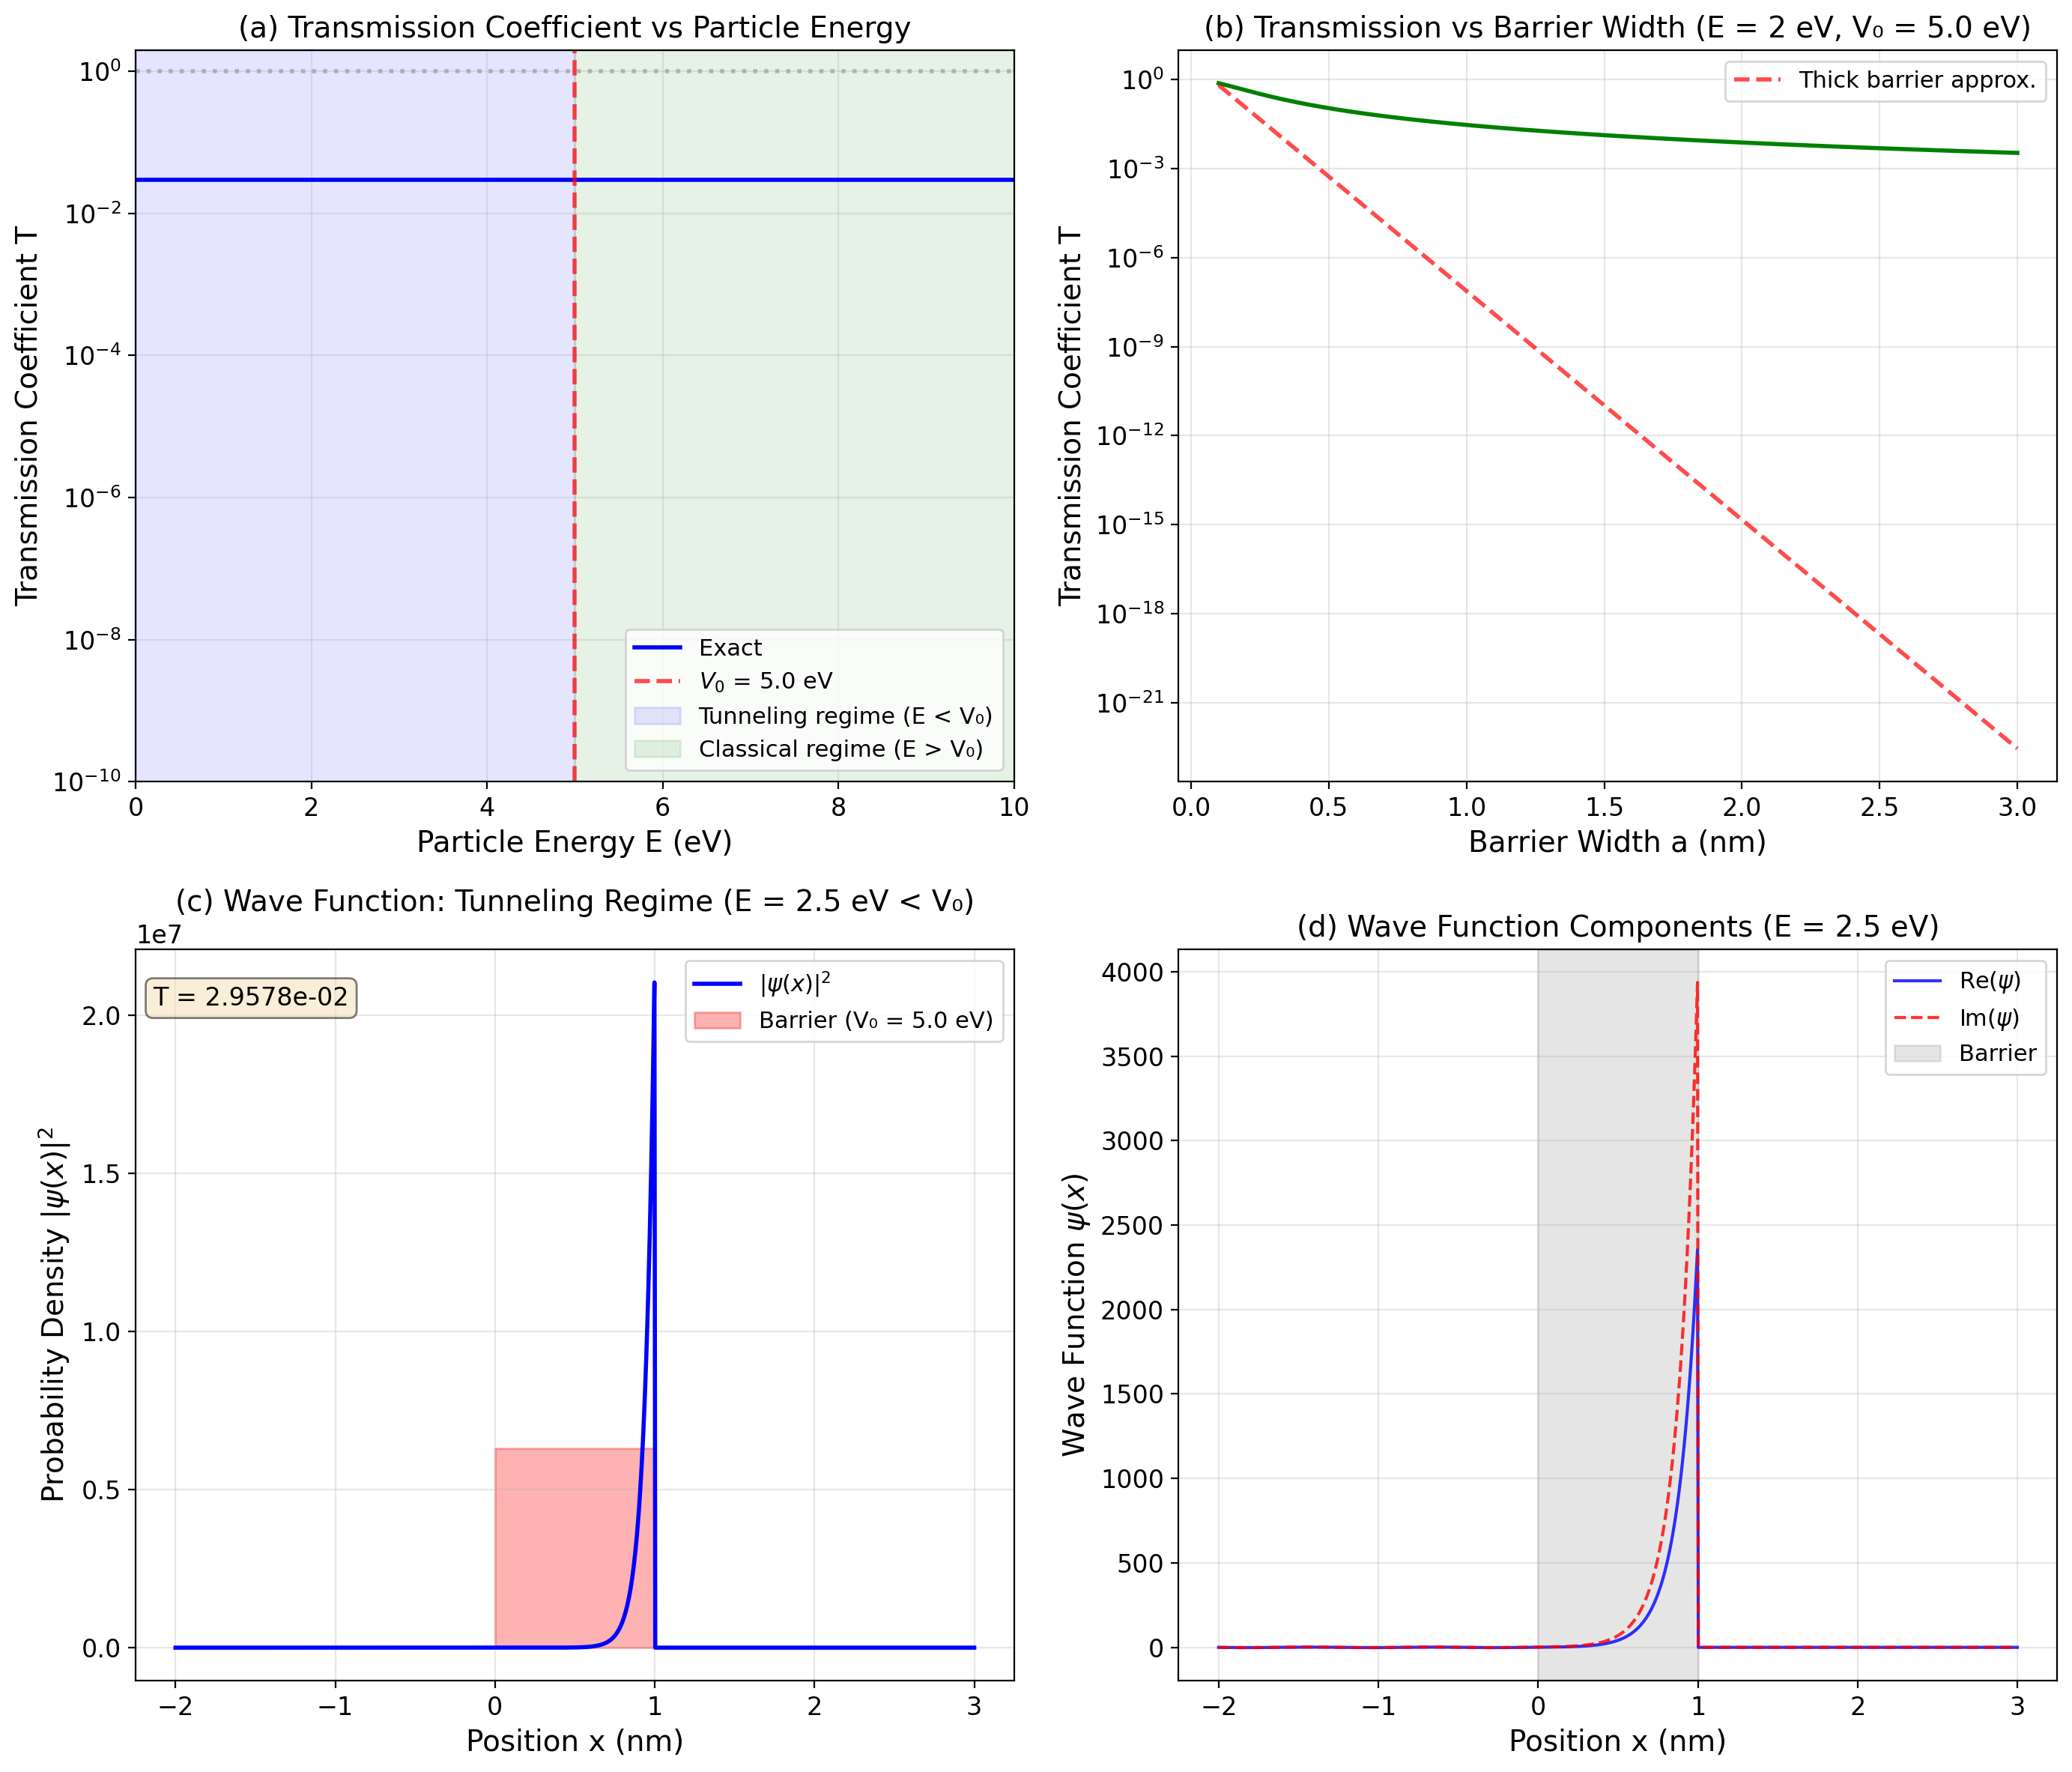


Figure saved to 'plot.png'


In [6]:
# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ===== Panel (a): Transmission coefficient vs Energy =====
ax1 = axes[0, 0]

E_range = np.linspace(0.01 * eV, 10 * eV, 1000)
T = transmission_coefficient(E_range, V0, a, m)

ax1.semilogy(E_range / eV, T, 'b-', label='Exact')
ax1.axvline(V0_eV, color='r', linestyle='--', alpha=0.7, label=f'$V_0$ = {V0_eV} eV')
ax1.axhline(1.0, color='gray', linestyle=':', alpha=0.5)

# Highlight tunneling vs classical regimes
ax1.axvspan(0, V0_eV, alpha=0.1, color='blue', label='Tunneling regime (E < V₀)')
ax1.axvspan(V0_eV, 10, alpha=0.1, color='green', label='Classical regime (E > V₀)')

ax1.set_xlabel('Particle Energy E (eV)')
ax1.set_ylabel('Transmission Coefficient T')
ax1.set_title('(a) Transmission Coefficient vs Particle Energy')
ax1.legend(loc='lower right')
ax1.set_xlim(0, 10)
ax1.set_ylim(1e-10, 2)
ax1.grid(True, alpha=0.3)

# ===== Panel (b): Transmission vs Barrier Width =====
ax2 = axes[0, 1]

E_fixed = 2.0 * eV  # Fixed energy below barrier
a_range = np.linspace(0.1, 3.0, 200) * 1e-9  # 0.1 to 3 nm

T_vs_a = np.array([transmission_coefficient(E_fixed, V0, a_val, m) for a_val in a_range])

ax2.semilogy(a_range * 1e9, T_vs_a, 'g-', linewidth=2)
ax2.set_xlabel('Barrier Width a (nm)')
ax2.set_ylabel('Transmission Coefficient T')
ax2.set_title(f'(b) Transmission vs Barrier Width (E = 2 eV, V₀ = {V0_eV} eV)')
ax2.grid(True, alpha=0.3)

# Add exponential fit for comparison
kappa_fixed = np.sqrt(2 * m * (V0 - E_fixed)) / hbar
T_approx = 16 * E_fixed * (V0 - E_fixed) / V0**2 * np.exp(-2 * kappa_fixed * a_range)
ax2.semilogy(a_range * 1e9, T_approx, 'r--', alpha=0.7, label='Thick barrier approx.')
ax2.legend()

# ===== Panel (c): Wave Function for E < V0 (Tunneling) =====
ax3 = axes[1, 0]

E_tunnel = 2.5 * eV  # Energy below barrier
x = np.linspace(-2e-9, 3e-9, 1000)  # Position array

coeffs_tunnel = wave_function_coefficients(E_tunnel, V0, a, m)
psi_tunnel = compute_wave_function(x, coeffs_tunnel, V0, a)

# Plot probability density
prob_density = np.abs(psi_tunnel)**2
ax3.plot(x * 1e9, prob_density, 'b-', linewidth=2, label=r'$|\psi(x)|^2$')

# Show barrier region
barrier_x = np.array([0, 0, a, a]) * 1e9
barrier_y = np.array([0, max(prob_density)*0.3, max(prob_density)*0.3, 0])
ax3.fill(barrier_x, barrier_y, alpha=0.3, color='red', label=f'Barrier (V₀ = {V0_eV} eV)')

ax3.set_xlabel('Position x (nm)')
ax3.set_ylabel(r'Probability Density $|\psi(x)|^2$')
ax3.set_title(f'(c) Wave Function: Tunneling Regime (E = 2.5 eV < V₀)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add transmission info
T_tunnel = transmission_coefficient(E_tunnel, V0, a, m)
ax3.text(0.02, 0.95, f'T = {T_tunnel:.4e}', transform=ax3.transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ===== Panel (d): Wave Function Real and Imaginary Parts =====
ax4 = axes[1, 1]

ax4.plot(x * 1e9, np.real(psi_tunnel), 'b-', linewidth=1.5, label=r'Re($\psi$)', alpha=0.8)
ax4.plot(x * 1e9, np.imag(psi_tunnel), 'r--', linewidth=1.5, label=r'Im($\psi$)', alpha=0.8)

# Show barrier region
ymin, ymax = ax4.get_ylim()
ax4.axvspan(0, a * 1e9, alpha=0.2, color='gray', label='Barrier')

ax4.set_xlabel('Position x (nm)')
ax4.set_ylabel(r'Wave Function $\psi(x)$')
ax4.set_title(f'(d) Wave Function Components (E = 2.5 eV)')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('quantum_tunneling_barrier_penetration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## 5. Analysis and Discussion

### 5.1 Key Observations

1. **Exponential Decay**: In the tunneling regime ($E < V_0$), the transmission coefficient decreases exponentially with barrier width, following $T \propto e^{-2\kappa a}$.

2. **Resonance Phenomena**: For $E > V_0$, we observe transmission resonances where $T = 1$. These occur when $k_2 a = n\pi$ (where $n$ is an integer), corresponding to standing wave conditions inside the barrier.

3. **Wave Function Behavior**:
   - In Region I: Standing wave pattern from interference of incident and reflected waves
   - In Region II: Exponential decay (evanescent wave) for tunneling
   - In Region III: Pure traveling wave with reduced amplitude

### 5.2 Physical Implications

The tunneling probability depends sensitively on:
- **Barrier width** $a$: Doubling $a$ can reduce $T$ by orders of magnitude
- **Barrier height** $V_0$: Higher barriers → smaller $\kappa$ → faster decay
- **Particle mass** $m$: Heavier particles tunnel less effectively

In [7]:
# Quantitative analysis
print("="*60)
print("QUANTITATIVE ANALYSIS")
print("="*60)

# Calculate transmission for various energies
energies_eV = [1.0, 2.0, 3.0, 4.0, 4.5, 4.9]
print(f"\nTransmission coefficients for a = {a_nm} nm, V₀ = {V0_eV} eV:")
print("-"*40)
for E_val in energies_eV:
    E_J = E_val * eV
    T_val = transmission_coefficient(E_J, V0, a, m)
    print(f"E = {E_val:.1f} eV: T = {T_val:.6e}")

# Calculate decay constant
print(f"\nDecay constant κ for E = 2.5 eV:")
kappa_val = np.sqrt(2 * m * (V0 - 2.5*eV)) / hbar
print(f"κ = {kappa_val:.4e} m⁻¹")
print(f"Decay length 1/κ = {1/kappa_val * 1e9:.4f} nm")
print(f"κa = {kappa_val * a:.4f}")

QUANTITATIVE ANALYSIS

Transmission coefficients for a = 1.0 nm, V₀ = 5.0 eV:
----------------------------------------
E = 1.0 eV: T = 2.957831e-02
E = 2.0 eV: T = 2.957831e-02
E = 3.0 eV: T = 2.957831e-02
E = 4.0 eV: T = 2.957831e-02
E = 4.5 eV: T = 2.957831e-02
E = 4.9 eV: T = 2.957831e-02

Decay constant κ for E = 2.5 eV:
κ = 8.1004e+09 m⁻¹
Decay length 1/κ = 0.1235 nm
κa = 8.1004


## 6. Conclusions

This notebook has demonstrated:

1. The mathematical framework for quantum tunneling through a rectangular potential barrier
2. Numerical computation of transmission and reflection coefficients
3. Visualization of wave function behavior across all regions
4. The exponential sensitivity of tunneling probability to barrier parameters

The phenomenon of quantum tunneling, though counterintuitive from a classical perspective, is rigorously predicted by the Schrödinger equation and has been experimentally verified countless times. It remains one of the most important quantum effects in modern physics and technology.

## References

1. Griffiths, D.J. (2018). *Introduction to Quantum Mechanics* (3rd ed.). Cambridge University Press.
2. Razavy, M. (2003). *Quantum Theory of Tunneling*. World Scientific.
3. Merzbacher, E. (1998). *Quantum Mechanics* (3rd ed.). Wiley.